In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("train.csv", skipinitialspace=True)
testing = pd.read_csv("test.csv", skipinitialspace=True)

In [3]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

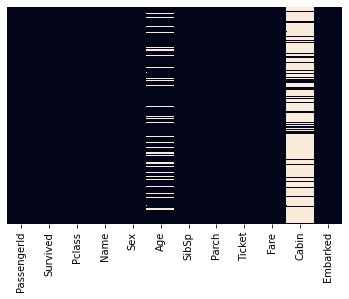

In [5]:
sn.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

In [6]:
pd.isnull(titanic).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

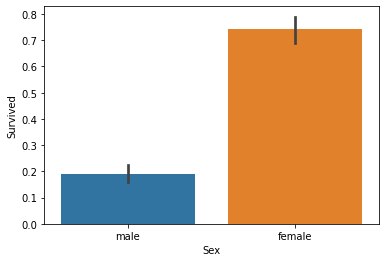

In [7]:
sn.barplot(titanic['Sex'], titanic['Survived'])

In [8]:
print("Percentage of male survived -> ",titanic["Survived"][titanic['Sex'] == "male"].value_counts(normalize="True")[1]*100)
print("Percentage of male survived -> ",titanic["Survived"][titanic['Sex'] == "female"].value_counts(normalize="True")[1]*100)

Percentage of male survived ->  18.890814558058924
Percentage of male survived ->  74.20382165605095


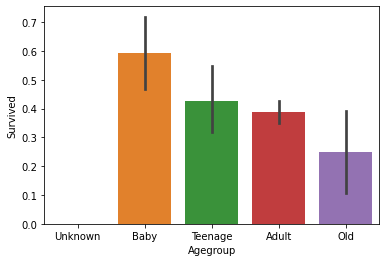

In [9]:
#titanic['Age'] = titanic['Age'].fillna(-0.5)
bini = [0,10,18,58,100]
labels = ["Unknown", "Baby", "Teenage", "Adult", "Old"]
titanic["Agegroup"] = pd.cut(titanic['Age'], bins=bini, labels= labels)

sn.barplot(x='Agegroup', y='Survived', data=titanic)

In [10]:
baby_mean=titanic[titanic["Agegroup"] == 'Baby']['Age'].mean()

In [11]:
old_mean = titanic[titanic['Agegroup'] == 'Old']['Age'].mean()

In [12]:
titanic['Agegroup'].value_counts()

Adult      547
Teenage     75
Baby        64
Old         28
Unknown      0
Name: Agegroup, dtype: int64

In [13]:
titanic[titanic['Survived'] == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [14]:
unknown_baby = titanic[(titanic['Survived'] == 1) & titanic['Age'].isnull()]
unknown_old = titanic[(titanic['Survived'] == 0) & titanic['Age'].isnull()]

In [15]:
titanic.drop(unknown_baby.index, inplace=True)
titanic.drop(unknown_old.index, inplace=True)

In [17]:
unknown_baby['Age'].fillna(baby_mean, inplace=True)
unknown_old['Age'].fillna(old_mean, inplace=True)

In [19]:
titanic = pd.concat([titanic, unknown_baby, unknown_old])

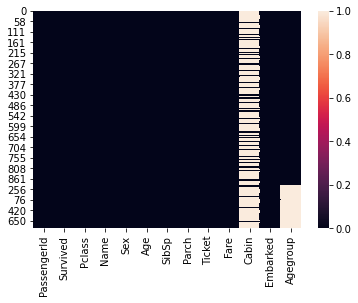

In [20]:
sn.heatmap(titanic.isnull())

In [21]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
titanic['Embarked'].fillna('S', inplace=True)

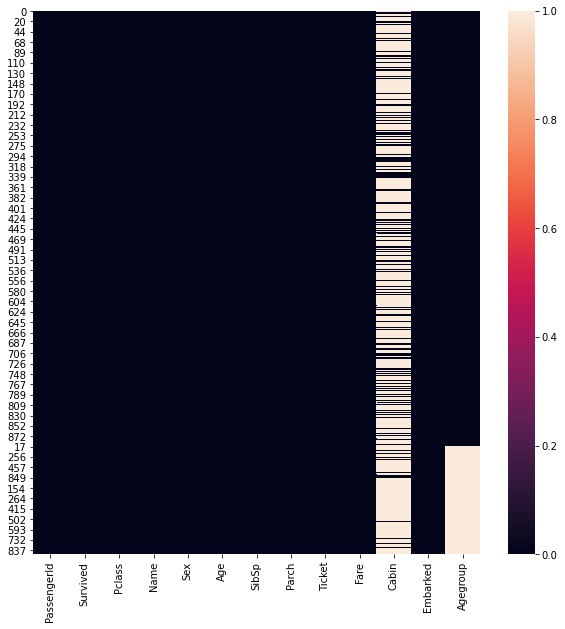

In [23]:
plt.figure(figsize=(10,10))
sn.heatmap(titanic.isnull())

In [24]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Agegroup  
0      0         A/5 21171   7.2500   NaN        S    Adult  
1      0          PC 17599  71.2833   C85        C    Adult  
2      0  STON/O2. 3101282   7.9250   NaN        S    Adult  
3      0            113803  53.1000  C123        S    Adult  
4      0            373450   8.0500   NaN        S    Adult

In [25]:
titanic.drop(labels=['Name','Ticket', 'Agegroup', 'Cabin'], axis=1, inplace=True)
testing.drop(labels=['Name','Ticket', 'Cabin'], axis=1, inplace=True)

In [26]:
titanic['Sex'].replace({'male':1, 'female':0}, inplace=True)
testing['Sex'].replace({'male':1, 'female':0}, inplace=True)

In [27]:
testing[testing['Age'].isnull()]

PassengerId  Pclass  Sex  Age  SibSp  Parch     Fare Embarked
10           902       3    1  NaN      0      0   7.8958        S
22           914       1    0  NaN      0      0  31.6833        S
29           921       3    1  NaN      2      0  21.6792        C
33           925       3    0  NaN      1      2  23.4500        S
36           928       3    0  NaN      0      0   8.0500        S
..           ...     ...  ...  ...    ...    ...      ...      ...
408         1300       3    0  NaN      0      0   7.7208        Q
410         1302       3    0  NaN      0      0   7.7500        Q
413         1305       3    1  NaN      0      0   8.0500        S
416         1308       3    1  NaN      0      0   8.0500        S
417         1309       3    1  NaN      1      1  22.3583        C

[86 rows x 8 columns]

In [28]:
titanic.drop('PassengerId', axis=1, inplace= True)

In [29]:
mapper = {"S":1,"Q":2,"C":3}
titanic['Embarked'] = titanic['Embarked'].map(mapper)
testing['Embarked'] = testing['Embarked'].map(mapper)

In [30]:
titanic= titanic.sample(frac=1, random_state=0)

In [31]:
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
626         0       2    1  57.0      0      0   12.3500         2
811         0       3    1  39.0      0      0   24.1500         1
345         1       2    0  24.0      0      0   13.0000         1
40          0       3    0  40.0      1      0    9.4750         1
318         1       1    0  31.0      0      2  164.8667         1

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train = titanic.drop('Survived', axis=1)
test = titanic['Survived']

In [34]:
X_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.22, random_state=0)

### Model Selection

In [36]:
#Hyperparamter Optimization
params = {
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7],
}

In [39]:
import xgboost
classify = xgboost.XGBClassifier(min_child_weight= 7,
 max_depth= 4,
 learning_rate= 0.15,
 gamma= 0.1,
 colsample_bytree= 0.4)

In [41]:
classify.fit(X_train,y_train)

[23:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(classify, param_distributions=params, scoring='roc_auc', n_jobs=-1,cv=5,verbose=3, random_state =0)

In [47]:
model = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.4s finished
[23:38:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
fianl_classify = model.best_estimator_

In [49]:
model.best_params_

{'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, classify.predict(x_test))

0.9035532994923858

In [43]:
ids = testing['PassengerId']
prediction = classify.predict(testing.drop('PassengerId', axis=1))

In [44]:
output = pd.DataFrame({'PassengerId':ids,'Survived':prediction})
output.to_csv("adarsh_malviya_ml", index=False)